In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import math
import matplotlib.pyplot as plt
import numpy as np
import io
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/spotify_songs-2.csv'
df2 = pd.read_csv(url)

In [3]:
#url = 'https://raw.githubusercontent.com/trishattah/Capstone/main/Emotion_Labels.csv'
#df3 = pd.read_csv(url)

In [4]:
#df4 = pd.merge(df2,df3,on='track_id')
#df4 = df2.drop(['Unnamed: 19'], axis=1)
df4=df2

In [5]:
df4 = df4.dropna()
df4.shape

(1099, 19)

In [6]:
df4['playlist_id'].value_counts()

4hKPJNFIhdAg4pAksn78FJ    11
3ykXidKLz1eYPvuGoFlD1e    11
1qXg9ck25tBRxeXsj8mbDG    10
5jROYSZSL7cO0jGAqkPx7C    10
4NlAd9NpIa92IjErMyAriM    10
                          ..
7sq6nuruoMyDhEWkX2oYOg     1
37i9dQZF1DWTLxOkM7PwUb     1
1eqVgsNjaX6mxDPoefhocT     1
2v41efarffe6iY8qpMK5Gj     1
71UHE27ayQs8ZDxQwY0cY1     1
Name: playlist_id, Length: 359, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df11 = df2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
cols = ['language', 'playlist_genre']
#df11[cols] = df11[cols].apply(LabelEncoder().fit_transform)

df12 = df2.set_index('track_name')

In [8]:
testdf = df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]
testdf1 =  df4[df4['playlist_id'].isin(['5jROYSZSL7cO0jGAqkPx7C'])]
testdf2 = df4[df4['playlist_id'].isin(['3ykXidKLz1eYPvuGoFlD1e'])]
testdf3 = df4[df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ'])]

In [9]:
testdf1_1 = testdf1.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf2_1 = testdf2.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
testdf3_1 = testdf3.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)

In [10]:
df5 = df4[~df4['playlist_id'].isin(['4hKPJNFIhdAg4pAksn78FJ', '3ykXidKLz1eYPvuGoFlD1e','4hKPJNFIhdAg4pAksn78FJ'])]

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df5 = df4.drop(['playlist_id','track_id','track_name','track_artist'], axis=1)
df5['emotion'] = df5['emotion'].astype(int)

In [13]:
df5.head(2)

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,language,emotion
0,41,rock,0.682,0.401,2,-10.068,1,0.0236,0.2790,0.01170,0.0887,0.566,97.091,tl,6
1,28,rock,0.303,0.880,9,-4.739,1,0.0442,0.0117,0.00994,0.3470,0.404,135.225,en,1


In [14]:
cols = ['language', 'playlist_genre']
df5[cols] = df5[cols].apply(LabelEncoder().fit_transform)

In [15]:
df11 = df5

In [16]:
df11['track_name'] = df4['track_name']
df5 = df5.drop(['track_name'], axis=1)

In [17]:
df11.iloc[517,15]

'Bandito'

In [18]:
df12 = df11.set_index('track_name')

In [19]:
testdf1_1[cols] = testdf1_1[cols].apply(LabelEncoder().fit_transform)
testdf2_1[cols] = testdf2_1[cols].apply(LabelEncoder().fit_transform)
testdf3_1[cols] = testdf3_1[cols].apply(LabelEncoder().fit_transform)

In [20]:
X, y = df5.iloc[:, :-1], df5.iloc[:, -1]
X.shape

(1099, 14)

In [21]:
#strategy = {1:200, 2:120, 3:150, 4:100, 5:150,6:120, 7:70, 8:45 ,9:45 ,10:40}
#oversample = SMOTE(sampling_strategy=strategy)
#X, y = oversample.fit_resample(X, y)
# summarize distribution
#counter = Counter(y)
#for k,v in counter.items():
#	per = v / len(y) * 100
#	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
#pyplot.bar(counter.keys(), counter.values())
#pyplot.show()

In [22]:
#df6 = pd.DataFrame(X)
#df6['emotion'] = y
#df7 = df6.sample(frac=1)
#df5 = df5.dropna()

In [23]:
df5.shape
scaler = MinMaxScaler()

In [24]:
df5['emotion'].value_counts()

1     393
6     137
3     108
5     103
7      91
2      91
4      67
8      39
10     38
9      32
Name: emotion, dtype: int64

In [25]:
train_data_001 = df5.iloc[:1024,7:]
train_data_01 = pd.DataFrame(scaler.fit_transform(train_data_001))
train_data_length = len(train_data_01)
train_data_01.shape

(1024, 8)

In [26]:
testdf1_2 = testdf1_1.iloc[:1024,7:]
testdf2_2 = testdf2_1.iloc[:1024,7:]
testdf3_2 = testdf3_1.iloc[:1024,7:]
df13 = df12.iloc[:1024,7:]

In [27]:
(train_data_01 < 0).values.any()

False

In [28]:
train_data = torch.tensor(train_data_01.values.astype(np.float32))

In [29]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

In [30]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [32]:
discriminator = Discriminator()

In [33]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 8),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

In [34]:
lr = 0.001
num_epochs = 500
loss_function = nn.BCELoss()

In [35]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [36]:
 len(list(train_loader)[0][0])

32

In [37]:
# list for final generated samples
final_generated_samples=[]
final_generated_samples_list=[]

In [38]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.ones((batch_size, 8))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.ones((batch_size, 8))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            final_generated_samples.append(generated_samples[0])
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
            

Epoch: 0 Loss D.: 0.821976900100708
Epoch: 0 Loss G.: 0.8296267986297607
Epoch: 10 Loss D.: 0.3209259510040283
Epoch: 10 Loss G.: 1.7388622760772705
Epoch: 20 Loss D.: 0.18318428099155426
Epoch: 20 Loss G.: 3.3157894611358643
Epoch: 30 Loss D.: 0.053492795675992966
Epoch: 30 Loss G.: 4.39606237411499
Epoch: 40 Loss D.: 0.07531259953975677
Epoch: 40 Loss G.: 4.747474670410156
Epoch: 50 Loss D.: 0.022701924666762352
Epoch: 50 Loss G.: 4.959232330322266
Epoch: 60 Loss D.: 0.050118811428546906
Epoch: 60 Loss G.: 4.474630355834961
Epoch: 70 Loss D.: 0.0003868865896947682
Epoch: 70 Loss G.: 10.988038063049316
Epoch: 80 Loss D.: 0.17281335592269897
Epoch: 80 Loss G.: 6.4027228355407715
Epoch: 90 Loss D.: 0.009645733051002026
Epoch: 90 Loss G.: 5.19867467880249
Epoch: 100 Loss D.: 0.005952564068138599
Epoch: 100 Loss G.: 10.270891189575195
Epoch: 110 Loss D.: 0.00487179309129715
Epoch: 110 Loss G.: 5.476537704467773
Epoch: 120 Loss D.: 0.018750112503767014
Epoch: 120 Loss G.: 5.319895267486572

In [39]:
# make a dataframe for sample list
for i in final_generated_samples:
  a = i.detach().numpy()
  final_generated_samples_list.append(a)
final_generated_samples_df = pd.DataFrame(final_generated_samples_list)

In [40]:
latent_space_samples[:10]

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

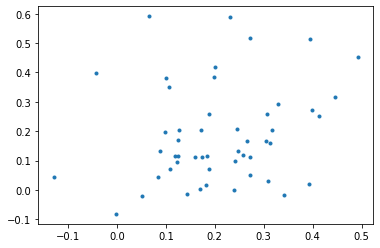

In [41]:
#plot of two variables from generated samples
plt.plot(final_generated_samples_df.iloc[:, 6], 
         final_generated_samples_df.iloc[:, 3], ".")

In [42]:
from scipy.spatial import distance

In [43]:
float_x = real_samples[0].double()

In [44]:
float_x = list(float_x.numpy())

In [45]:
# Cosine similarity
def square_rooted(x):
   return round(math.sqrt(sum([a*a for a in x])),3)
  
def cosine_similarity(x,y):
 numerator = sum(a*b for a,b in zip(x,y))
 denominator = square_rooted(x)*square_rooted(y)
 return round(numerator/float(denominator),3)
  
print(cosine_similarity(final_generated_samples_df[0],float_x))

0.036


In [46]:
#Jaccard similarity
from math import*
  
def jaccard_similarity(x,y):
 intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
 union_cardinality = len(set.union(*[set(x), set(y)]))
 return intersection_cardinality/float(union_cardinality)
print(jaccard_similarity([0,1,2,5,6],[0,2,3,5,7,9]))

0.375


In [47]:
#jaccard_score(final_generated_samples_df.iloc[0,:].values,float_x)

In [48]:
final_generated_samples_df.iloc[0,:].values

array([0.14894742, 0.29160666, 0.2188696 , 0.38612258, 0.83226854,
       0.64618027, 0.19917183, 0.49063921])

In [49]:
real_samples[0]

tensor([0.1744, 0.0683, 0.0441, 0.1945, 0.5356, 0.7398, 0.1667, 0.0000])

In [50]:
final_generated_samples_df.iloc[3,:].values

array([ 0.16291963, -0.09185585,  0.11697014, -0.01251706,  0.45466495,
        0.19724479,  0.14255458, -0.30071032])

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity

In [52]:
df9 = pd.DataFrame(scaler.inverse_transform(final_generated_samples_df))
df10 = pd.DataFrame(scaler.inverse_transform(train_data_01))

In [53]:
generated_vals2=[]
for i, j in df9.iterrows():
  generated_vals2.append(j.values)

generated_vals3 = generated_vals2[:10]

train_data_vals2=[]
for i, j in train_data_001.iterrows():
  train_data_vals2.append(j.values)


In [54]:
train_data_vals2[517]

array([5.91000e-02, 3.33000e-01, 0.00000e+00, 1.28000e-01, 4.47000e-01,
       1.32097e+02, 8.00000e+00, 5.00000e+00])

In [55]:
generated_vals=[]
for i, j in final_generated_samples_df.iterrows():
  generated_vals.append(j.values)

train_data_vals=[]
for i, j in train_data_01.iterrows():
  train_data_vals.append(j.values)

def cos_similarity(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

In [56]:
def euclid_similarity(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = df13.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [57]:
dst = distance.euclidean(final_generated_samples_df.iloc[0,:].values,float_x)
print('Euclidean distance: %.3f' % dst)

Euclidean distance: 0.675


In [58]:
df5.shape

(1099, 15)

In [59]:
# pick recommendations with cosine similarity
for i in generated_vals3:
  a = cos_similarity(i,train_data_vals2)

len train data: 1024 ; index: More ; cos sim: [[0.99999716]]
len train data: 1024 ; index: LUNA ; cos sim: [[0.99995604]]
len train data: 1024 ; index: Lost Control ; cos sim: [[0.99997959]]
len train data: 1024 ; index: Chillax ; cos sim: [[0.99968295]]
len train data: 1024 ; index: Mayor Que Yo 3 ; cos sim: [[0.99999186]]
len train data: 1024 ; index: 48H (feat. Sfera Ebbasta) ; cos sim: [[0.99999331]]
len train data: 1024 ; index: Vamos a Portarnos Mal ; cos sim: [[0.99999829]]
len train data: 1024 ; index: Dag 1 ; cos sim: [[0.9995876]]
len train data: 1024 ; index: Quien La Vio Llorar ; cos sim: [[0.9999904]]
len train data: 1024 ; index: She's Playing Hard To Get ; cos sim: [[0.99999584]]


In [60]:
# pick recommendations with euclidean similarity
for i in generated_vals3:
  a = euclid_similarity(i,train_data_vals2)

len train data: 1024 ; index: Tequila ; euclid sim: 0.8399510394145935
len train data: 1024 ; index: Seele ; euclid sim: 2.611530772800823
len train data: 1024 ; index: Champion ; euclid sim: 4.376658987732455
len train data: 1024 ; index: Into You (feat. Fabolous) ; euclid sim: 2.7902935876281805
len train data: 1024 ; index: Red ; euclid sim: 2.1909584858016418
len train data: 1024 ; index: Bon Bon Chocolat ; euclid sim: 2.236488846733866
len train data: 1024 ; index: Conquista ; euclid sim: 1.2846247849314156
len train data: 1024 ; index: Realtalk Infinity ; euclid sim: 4.561944832738586
len train data: 1024 ; index: 48H (feat. Sfera Ebbasta) ; euclid sim: 3.2694662297300763
len train data: 1024 ; index: Panama - 2015 Remaster ; euclid sim: 1.0135233468507443


In [61]:
testdf1_3 = testdf1_2
testdf1_3['track_name'] = testdf1['track_name']
testdf1_3 = testdf1_3.set_index('track_name')

testdf2_3 = testdf2_2
testdf2_3['track_name'] = testdf2['track_name']
testdf2_3 = testdf2_3.set_index('track_name')

testdf3_3 = testdf3_2
testdf3_3['track_name'] = testdf3['track_name']
testdf3_3 = testdf3_3.set_index('track_name')

In [62]:
test_data1 = testdf1_3.values
test_data2 = testdf2_3.values
test_data3 = testdf3_3.values

In [63]:
def cos_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t1(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf1_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [64]:
#compare recomendations to test subjects
for i in generated_vals3:
  a = cos_similarity_t1(i,test_data1)

len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99988924]]
len train data: 10 ; index: Howling ; cos sim: [[0.99999409]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99954109]]
len train data: 10 ; index: Lower ; cos sim: [[0.99910558]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99920916]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.9990337]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99932483]]
len train data: 10 ; index: Afternoon ; cos sim: [[0.99977645]]
len train data: 10 ; index: Un autre que moi ; cos sim: [[0.99905269]]
len train data: 10 ; index: Lower ; cos sim: [[0.99987052]]


In [65]:
for i in generated_vals3:
  a = euclid_similarity_t1(i,test_data1)

len train data: 10 ; index: Love Is a Bitch ; euclid sim: 7.804801182287756
len train data: 10 ; index: Un autre que moi ; euclid sim: 2.316910114929961
len train data: 10 ; index: Tainted ; euclid sim: 12.74057315677476
len train data: 10 ; index: Un autre que moi ; euclid sim: 12.325017364339365
len train data: 10 ; index: Lower ; euclid sim: 7.213471719043104
len train data: 10 ; index: Jungle ; euclid sim: 9.031150809895523
len train data: 10 ; index: Song For You ; euclid sim: 5.909445185486709
len train data: 10 ; index: Song For You ; euclid sim: 2.593604824144112
len train data: 10 ; index: Love Is a Bitch ; euclid sim: 8.529872646231595
len train data: 10 ; index: Jungle ; euclid sim: 5.216837317317472


In [66]:
def cos_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = cosine_similarity([x],[i])
    recommended.append(a)
  rec_score=max(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; cos sim:',rec_score)

def euclid_similarity_t2(x,d):
  recommended = []  
  for i in d:
    a = distance.euclidean([x],[i])
    recommended.append(a)
  rec_score=min(recommended)
  rec_index = recommended.index(rec_score)
  rec_idx = testdf2_3.index[rec_index]
  rec_len = len(recommended)
  print('len train data:',rec_len,'; index:',rec_idx,'; euclid sim:',rec_score)

In [67]:
#compare recomendations to test subjects
for i in generated_vals3:
  a = cos_similarity_t2(i,test_data2)

len train data: 11 ; index: When Can I See You ; cos sim: [[0.99973375]]
len train data: 11 ; index: Rump Shaker ; cos sim: [[0.99997288]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99926898]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99931429]]
len train data: 11 ; index: Rump Shaker ; cos sim: [[0.99905043]]
len train data: 11 ; index: I'm Dreamin' ; cos sim: [[0.99868214]]
len train data: 11 ; index: I'm Dreamin' ; cos sim: [[0.99916112]]
len train data: 11 ; index: When Can I See You ; cos sim: [[0.99974625]]
len train data: 11 ; index: I Adore Mi Amor ; cos sim: [[0.99859755]]
len train data: 11 ; index: She's Playing Hard To Get ; cos sim: [[0.99988124]]


In [68]:
for i in generated_vals3:
  a = euclid_similarity_t2(i,test_data2)

len train data: 11 ; index: Just Got Paid ; euclid sim: 39.4357017145242
len train data: 11 ; index: Nasty ; euclid sim: 0.8471093523075316
len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 14.537745141209436
len train data: 11 ; index: I Adore Mi Amor ; euclid sim: 4.694317687175093
len train data: 11 ; index: She's Playing Hard To Get ; euclid sim: 37.72793636957489
len train data: 11 ; index: Just Got Paid ; euclid sim: 24.459318796116403
len train data: 11 ; index: Lyte as a Rock ; euclid sim: 4.76410879967855
len train data: 11 ; index: Miss You Much ; euclid sim: 3.422754344831034
len train data: 11 ; index: Just Got Paid ; euclid sim: 36.31698542099135
len train data: 11 ; index: Just Got Paid ; euclid sim: 24.479460329389727
